# 55_RNN - LSTM

### simple RNN 의 단점
- 입력 데이터가 길어지면 학습 능력이 떨어진다. (`Long-term Dependency` 문제)
- 현재의 답을 얻기 위해 과거의 정보에 의존해야 하는 RNN이지만, `과거 시점이 현재와 너무 멀어지면 문제를 풀기 어렵다`


--------------------------

# LSTM
- Cell State가 중요하다.
- 이전의 기억을 얼마나 반영하고, 지금 입력을 얼마나 넣을 것인가

In [1]:
import numpy as np

X = []
Y = []
for i in range(3000):
    lst = np.random.rand(100)
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.00000000e+00 8.36017523e-01]
 [0.00000000e+00 6.78725721e-01]
 [0.00000000e+00 3.86660033e-01]
 [0.00000000e+00 2.01385505e-01]
 [0.00000000e+00 3.06199639e-01]
 [0.00000000e+00 7.07880581e-01]
 [0.00000000e+00 9.48700989e-01]
 [0.00000000e+00 6.06233399e-02]
 [0.00000000e+00 9.49934598e-02]
 [0.00000000e+00 1.45716740e-01]
 [0.00000000e+00 7.90738284e-01]
 [0.00000000e+00 1.93153161e-01]
 [0.00000000e+00 3.94417557e-01]
 [0.00000000e+00 2.22130637e-01]
 [0.00000000e+00 5.42786848e-01]
 [0.00000000e+00 6.69285224e-01]
 [0.00000000e+00 5.52348726e-01]
 [0.00000000e+00 3.14339285e-01]
 [0.00000000e+00 1.91636477e-02]
 [0.00000000e+00 6.71618175e-02]
 [0.00000000e+00 9.54581211e-01]
 [0.00000000e+00 6.56047191e-02]
 [0.00000000e+00 8.48462626e-01]
 [0.00000000e+00 5.20967432e-02]
 [0.00000000e+00 3.21137188e-01]
 [0.00000000e+00 5.43798125e-01]
 [0.00000000e+00 5.32399362e-01]
 [0.00000000e+00 2.11989272e-01]
 [0.00000000e+00 1.74868062e-01]
 [0.00000000e+00 8.86515755e-03]
 [0.000000

# SimpleRNN 모델로 진행

In [2]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 30)           990       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30)                1830      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 훈련
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 11s 118ms/step - loss: 0.0782 - val_loss: 0.0540
Epoch 2/100
64/64 [==============================] - 7s 116ms/step - loss: 0.0501 - val_loss: 0.0525
Epoch 3/100
64/64 [==============================] - 7s 114ms/step - loss: 0.0496 - val_loss: 0.0553
Epoch 4/100
64/64 [==============================] - 9s 145ms/step - loss: 0.0503 - val_loss: 0.0522
Epoch 5/100
64/64 [==============================] - 9s 143ms/step - loss: 0.0497 - val_loss: 0.0497
Epoch 6/100
64/64 [==============================] - 14s 222ms/step - loss: 0.0486 - val_loss: 0.0505
Epoch 7/100
64/64 [==============================] - 15s 229ms/step - loss: 0.0483 - val_loss: 0.0504
Epoch 8/100
64/64 [==============================] - 13s 208ms/step - loss: 0.0498 - val_loss: 0.0505
Epoch 9/100
64/64 [==============================] - 11s 163ms/step - loss: 0.0486 - val_loss: 0.0523
Epoch 10/100
64/64 [==============================] - 10s 154ms/step - loss: 0.0485 - 

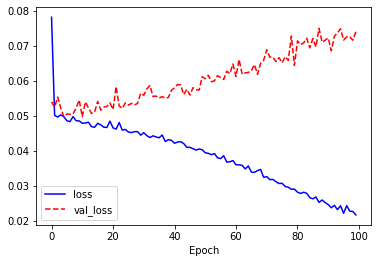

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

> ### 학습 결과는 별로 좋지 않음

--------------------------
# LSTM 으로 해보자

In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.LSTM(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 30)           3960      
                                                                 
 lstm_1 (LSTM)               (None, 30)                7320      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fit
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 6s 22ms/step - loss: 0.0522 - val_loss: 0.0497
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0478 - val_loss: 0.0492
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0480 - val_loss: 0.0495
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0478 - val_loss: 0.0492
Epoch 5/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0480 - val_loss: 0.0492
Epoch 6/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0478 - val_loss: 0.0493
Epoch 7/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0478 - val_loss: 0.0492
Epoch 8/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0478 - val_loss: 0.0491
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0476 - val_loss: 0.0491
Epoch 10/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0479 - val_loss: 0.0495

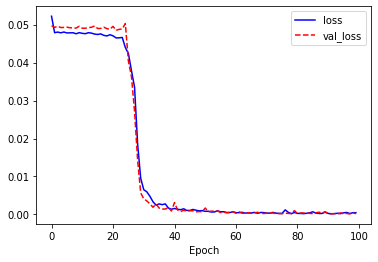

In [7]:
# evaluate
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

> ### SimpleRNN 보다 결과가 좋아진 것을 볼 수 있다.